In [1]:
import pandas as pd

In [2]:
import datetime

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
eq = pd.read_csv('Datasets/Earthquake.csv')

In [5]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [6]:
dates = pd.to_datetime(eq['Date'])

In [7]:
dates

0        1965-01-02 00:00:00
1        1965-01-04 00:00:00
2        1965-01-05 00:00:00
3        1965-01-08 00:00:00
4        1965-01-09 00:00:00
                ...         
23407    2016-12-28 00:00:00
23408    2016-12-28 00:00:00
23409    2016-12-28 00:00:00
23410    2016-12-29 00:00:00
23411    2016-12-30 00:00:00
Name: Date, Length: 23412, dtype: object

In [8]:
date_lengths = eq.Date.str.len()
date_lengths.value_counts() 

10    23409
24        3
Name: Date, dtype: int64

checking for consistent data entry

In [9]:
date_lengths

0        10
1        10
2        10
3        10
4        10
         ..
23407    10
23408    10
23409    10
23410    10
23411    10
Name: Date, Length: 23412, dtype: int64

In [10]:
idc = np.where([date_lengths == 24])[1]

In [11]:
eq.loc[idc, 'Date']

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [12]:
eq.loc[3378, "Date"] = "02/23/1975"
eq.loc[7512, "Date"] = "04/28/1985"
eq.loc[20650, "Date"] = "03/13/2011"

In [13]:
eq['Date'] = pd.to_datetime(eq['Date'])

In [14]:
eq['Date']

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23412, dtype: datetime64[ns]

In [15]:
eq['Year'] = eq['Date'].dt.year
eq['Month'] = eq['Date'].dt.month

In [16]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016,12
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016,12
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016,12
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016,12


In [17]:
eq[['Month', 'Year']].isna().sum()

Month    0
Year     0
dtype: int64

In [18]:
import seaborn as sns

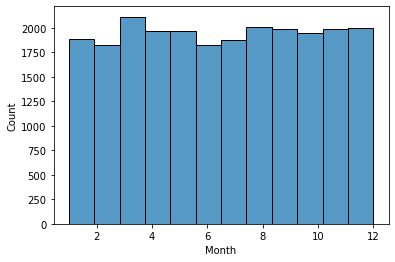

In [19]:
sns.histplot(eq['Month'], bins=12);

In [20]:
len(eq.Year.unique())

52

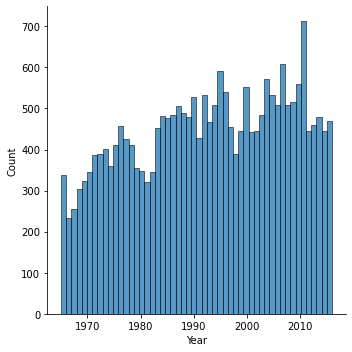

In [21]:
sns.displot(eq.Year, bins=52);

In [22]:
year_count  = eq.groupby('Year').Year.count()

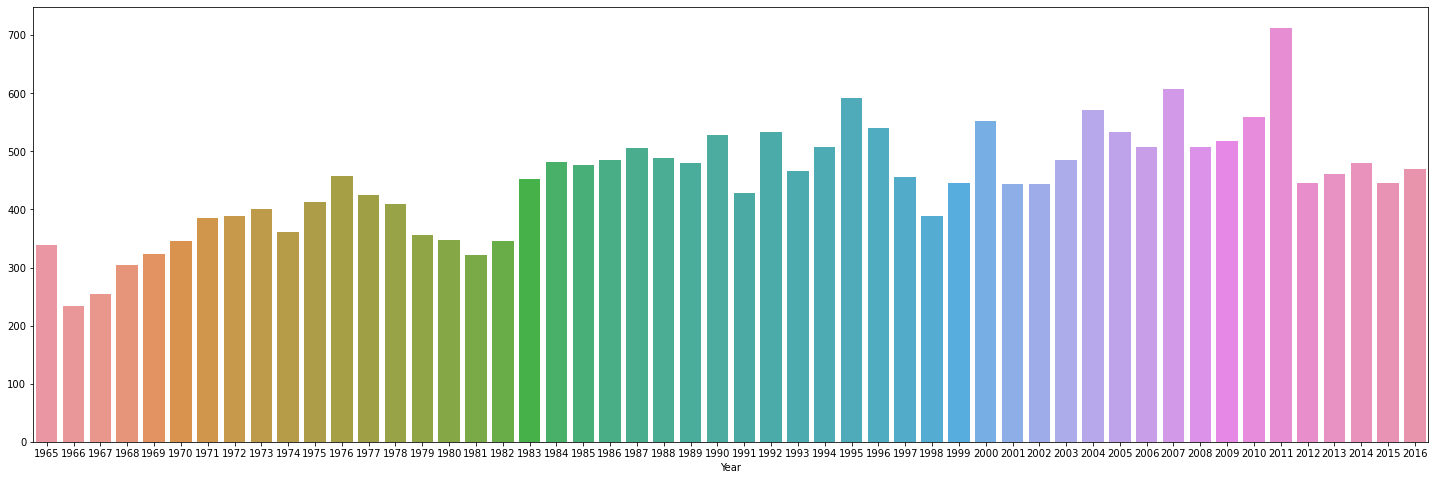

In [23]:
plt.figure(figsize=(25,8))
sns.barplot(x=year_count.index, y=year_count.values);

In [24]:
eq = eq.drop(['ID', 'Source'],axis=1)

In [25]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Location Source,Magnitude Source,Status,Year,Month
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN,NN,Reviewed,2016,12
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN,NN,Reviewed,2016,12
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US,US,Reviewed,2016,12
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US,US,Reviewed,2016,12


In [26]:
eq['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

In [27]:
eq['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [28]:
eq['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

Data dictionary

- depth: Earthquakes can occur anywhere between the Earth's surface and about 700 kilometers below the surface. For scientific purposes, this earthquake depth range of 0 - 700 km is divided into three zones: shallow, intermediate, and deep.
Shallow earthquakes are between 0 and 70 km deep; intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 300 - 700 km deep. In general, the term "deep-focus earthquakes" is applied to earthquakes deeper than 70 km.

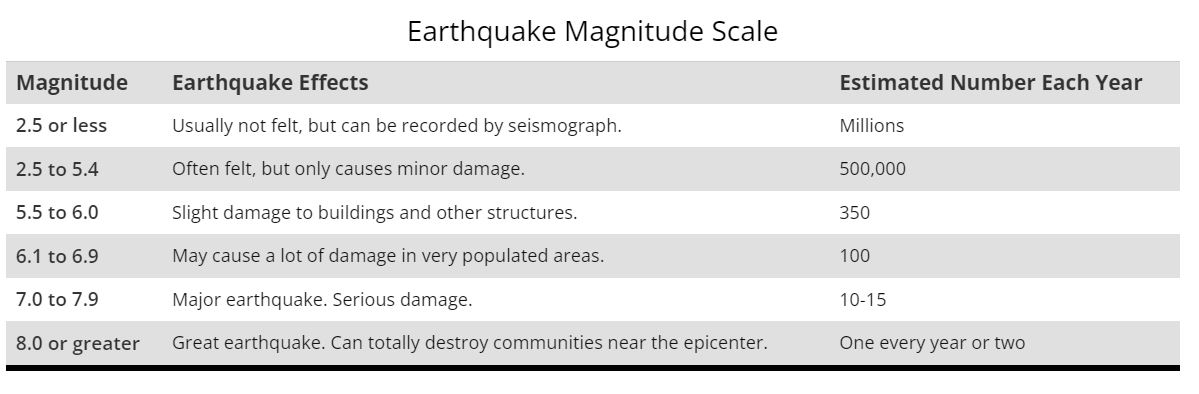


- Azimuthal gap is the maximum angle separating two adjacent seismic stations, both measured from the epicenter of an earthquake (Fig. 7). If azimuthal gap is more than 180°, the location accuracy degrades significantly



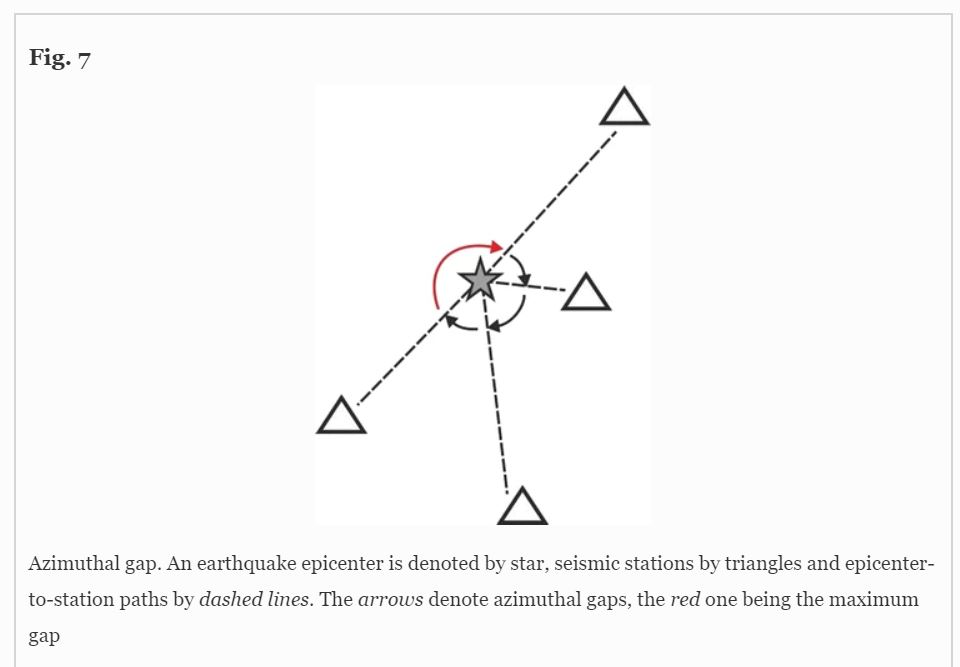

In [29]:
eq['Depth'].mean()

70.76791124209808

In [30]:
eq['Magnitude'].max()

9.1

In [31]:
eq['Magnitude'].mean()

5.882530753460003

In [32]:
eq.groupby('Type').size()

Type
Earthquake           23232
Explosion                4
Nuclear Explosion      175
Rock Burst               1
dtype: int64

In [33]:
eq[['Date', 'Type', 'Depth', 'Magnitude', 'Azimuthal Gap', 'Horizontal Distance', 'Latitude', 'Longitude']].isna().sum()

Date                       0
Type                       0
Depth                      0
Magnitude                  0
Azimuthal Gap          16113
Horizontal Distance    21808
Latitude                   0
Longitude                  0
dtype: int64

In [34]:
eq.shape[0]

23412

In [35]:
eq = eq.drop(['Horizontal Distance', 'Azimuthal Gap'], axis=1)

In [36]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Horizontal Error,Root Mean Square,Location Source,Magnitude Source,Status,Year,Month
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,Automatic,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,NaN,0.1898,NN,NN,Reviewed,2016,12
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,NaN,0.2187,NN,NN,Reviewed,2016,12
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,4.8,1.5200,US,US,Reviewed,2016,12
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,6.0,1.4300,US,US,Reviewed,2016,12


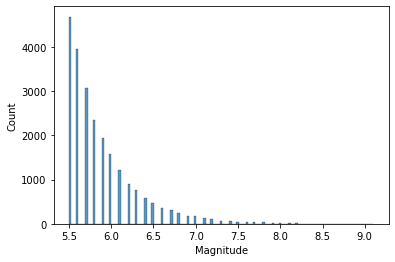

In [37]:
sns.histplot(eq['Magnitude']);

In [38]:
eq['Depth'].quantile(0.25)

14.522499999999999

In [39]:
eq['Depth'].quantile(0.5)

33.0

In [40]:
eq['Depth'].quantile(0.75)

54.0

more data viz through Tableau

In [41]:
eq = eq.drop(['Location Source', 'Magnitude Source'], axis=1)

In [42]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Horizontal Error,Root Mean Square,Status,Year,Month
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,NaN,0.1898,Reviewed,2016,12
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,NaN,0.2187,Reviewed,2016,12
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,4.8,1.5200,Reviewed,2016,12
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,6.0,1.4300,Reviewed,2016,12


In [43]:
eq.to_csv('Datasets/eq_modified.csv')

In [44]:
eq[eq['Magnitude'] == 5.5]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Horizontal Error,Root Mean Square,Status,Year,Month
12,1965-01-29,09:35:30,54.6360,161.7030,Earthquake,55.00,NaN,NaN,5.5,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
69,1965-03-01,09:08:48,-5.3710,152.0550,Earthquake,40.00,NaN,NaN,5.5,MW,NaN,NaN,NaN,NaN,Automatic,1965,3
78,1965-03-05,06:15:04,50.9280,179.5110,Earthquake,30.00,NaN,NaN,5.5,MW,NaN,NaN,NaN,NaN,Automatic,1965,3
151,1965-05-19,13:59:55,-4.8190,152.4360,Earthquake,50.00,NaN,NaN,5.5,MW,NaN,NaN,NaN,NaN,Automatic,1965,5
166,1965-06-11,07:11:04,44.1330,149.2550,Earthquake,31.60,NaN,NaN,5.5,MW,NaN,NaN,NaN,NaN,Automatic,1965,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23390,2016-12-18,06:15:46,-34.9886,-107.8694,Earthquake,10.00,1.6,NaN,5.5,MWB,0.110,8.0,11.9,0.8000,Reviewed,2016,12
23393,2016-12-18,11:35:48,-10.1904,161.2187,Earthquake,57.52,5.2,NaN,5.5,MB,0.048,147.0,8.8,0.7900,Reviewed,2016,12
23398,2016-12-20,20:07:53,-10.1549,160.7816,Earthquake,10.38,3.2,NaN,5.5,MWB,0.048,41.0,7.0,0.7000,Reviewed,2016,12
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,NaN,0.2187,Reviewed,2016,12


In [45]:
eq[eq['Magnitude'] == 6.0]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Horizontal Error,Root Mean Square,Status,Year,Month
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
7,1965-01-15,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
8,1965-01-16,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
14,1965-02-02,15:56:51,37.5230,73.2510,Earthquake,15.00,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,2
17,1965-02-04,06:04:59,51.6390,175.0550,Earthquake,30.00,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,2016-12-08,05:15:05,43.8229,86.3451,Earthquake,17.55,2.9,NaN,6.0,MWW,NaN,NaN,7.4,0.82,Reviewed,2016,12
23380,2016-12-10,16:24:35,-5.6593,154.4734,Earthquake,142.58,3.9,NaN,6.0,MWW,NaN,NaN,8.6,0.80,Reviewed,2016,12
23383,2016-12-14,02:01:23,21.2897,144.4037,Earthquake,22.37,1.8,NaN,6.0,MWW,NaN,NaN,7.3,1.01,Reviewed,2016,12
23397,2016-12-20,12:33:14,-10.1785,160.9149,Earthquake,10.00,1.6,NaN,6.0,MWW,NaN,NaN,5.7,0.88,Reviewed,2016,12


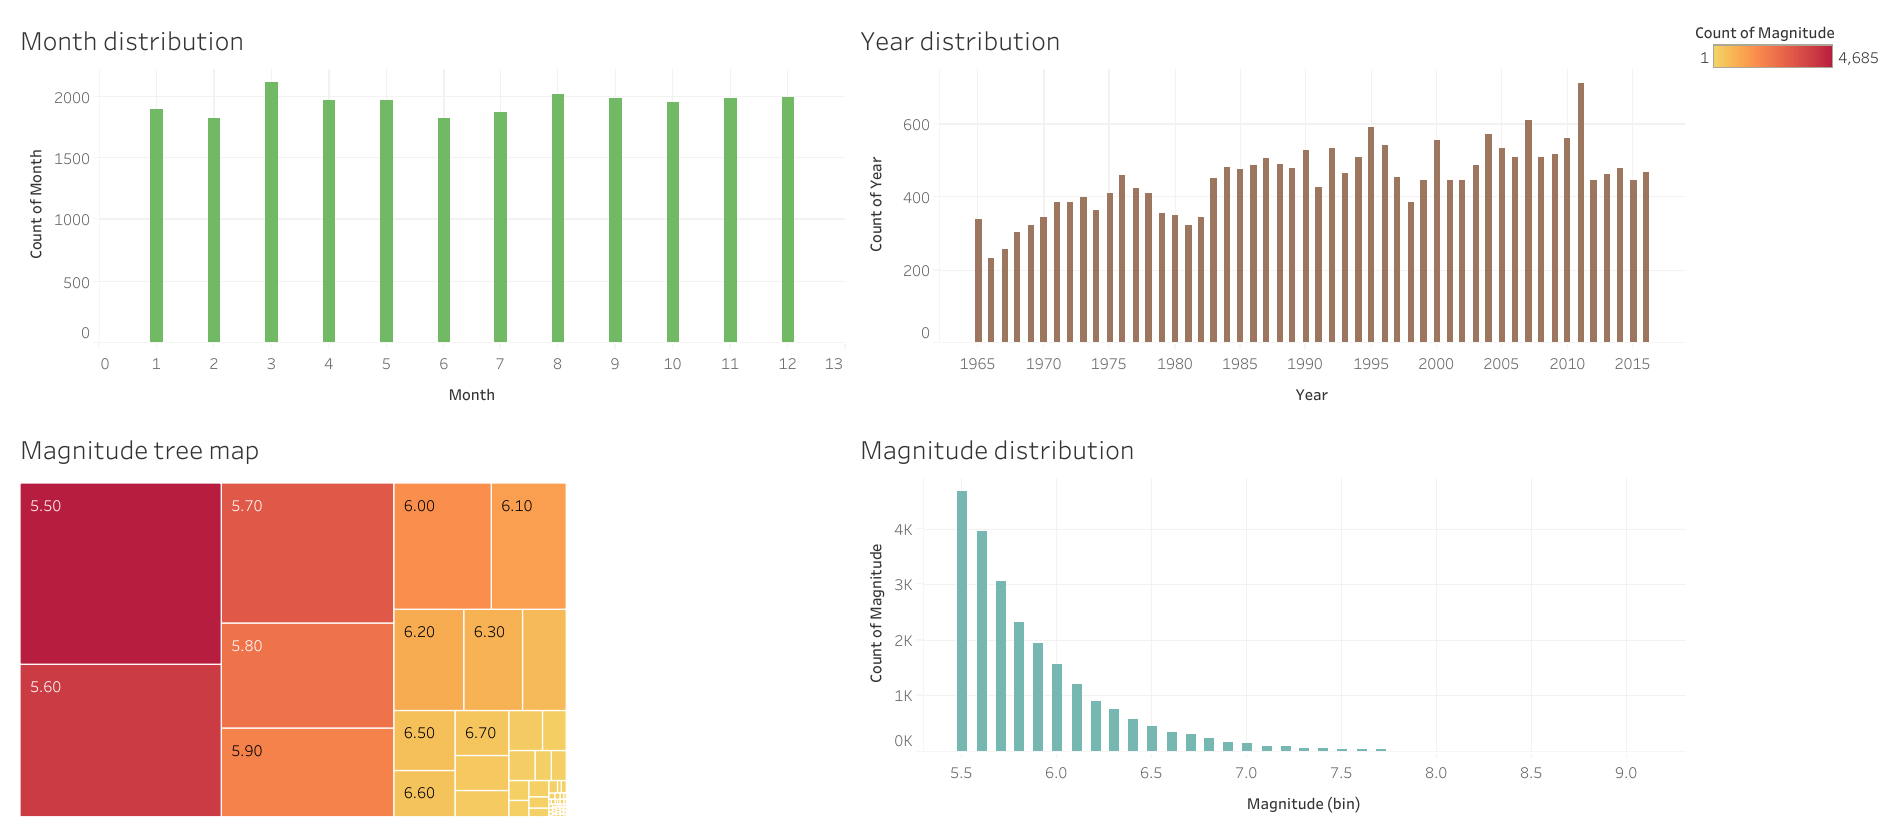

In [46]:
eq

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Horizontal Error,Root Mean Square,Status,Year,Month
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,Automatic,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,NaN,0.1898,Reviewed,2016,12
23408,2016-12-28,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,NaN,0.2187,Reviewed,2016,12
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,4.8,1.5200,Reviewed,2016,12
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,6.0,1.4300,Reviewed,2016,12


making more visuals on Tableau

In [69]:
avg_depth_per_yr = eq.groupby('Year').Depth.agg('mean')
avg_magnitude_per_yr = eq.groupby('Year').Magnitude.agg(['mean', min, max])

In [71]:
avg_depth_per_yr.to_csv('Datasets/avg_depth.csv')

In [72]:
avg_magnitude_per_yr.to_csv('Datasets/avg_mag.csv')

In [74]:
avg_magnitude_per_yr[:10]

,mean,min,max
Year,,,
1965,6.014159,5.5,8.7
1966,6.040470,5.5,8.1
1967,6.003922,5.5,7.4
1968,6.078525,5.5,8.2
1969,6.009350,5.5,7.8
1970,6.035768,5.5,8.0
1971,5.972539,5.5,8.1
1972,5.943814,5.5,8.0
1973,5.814065,5.5,7.7


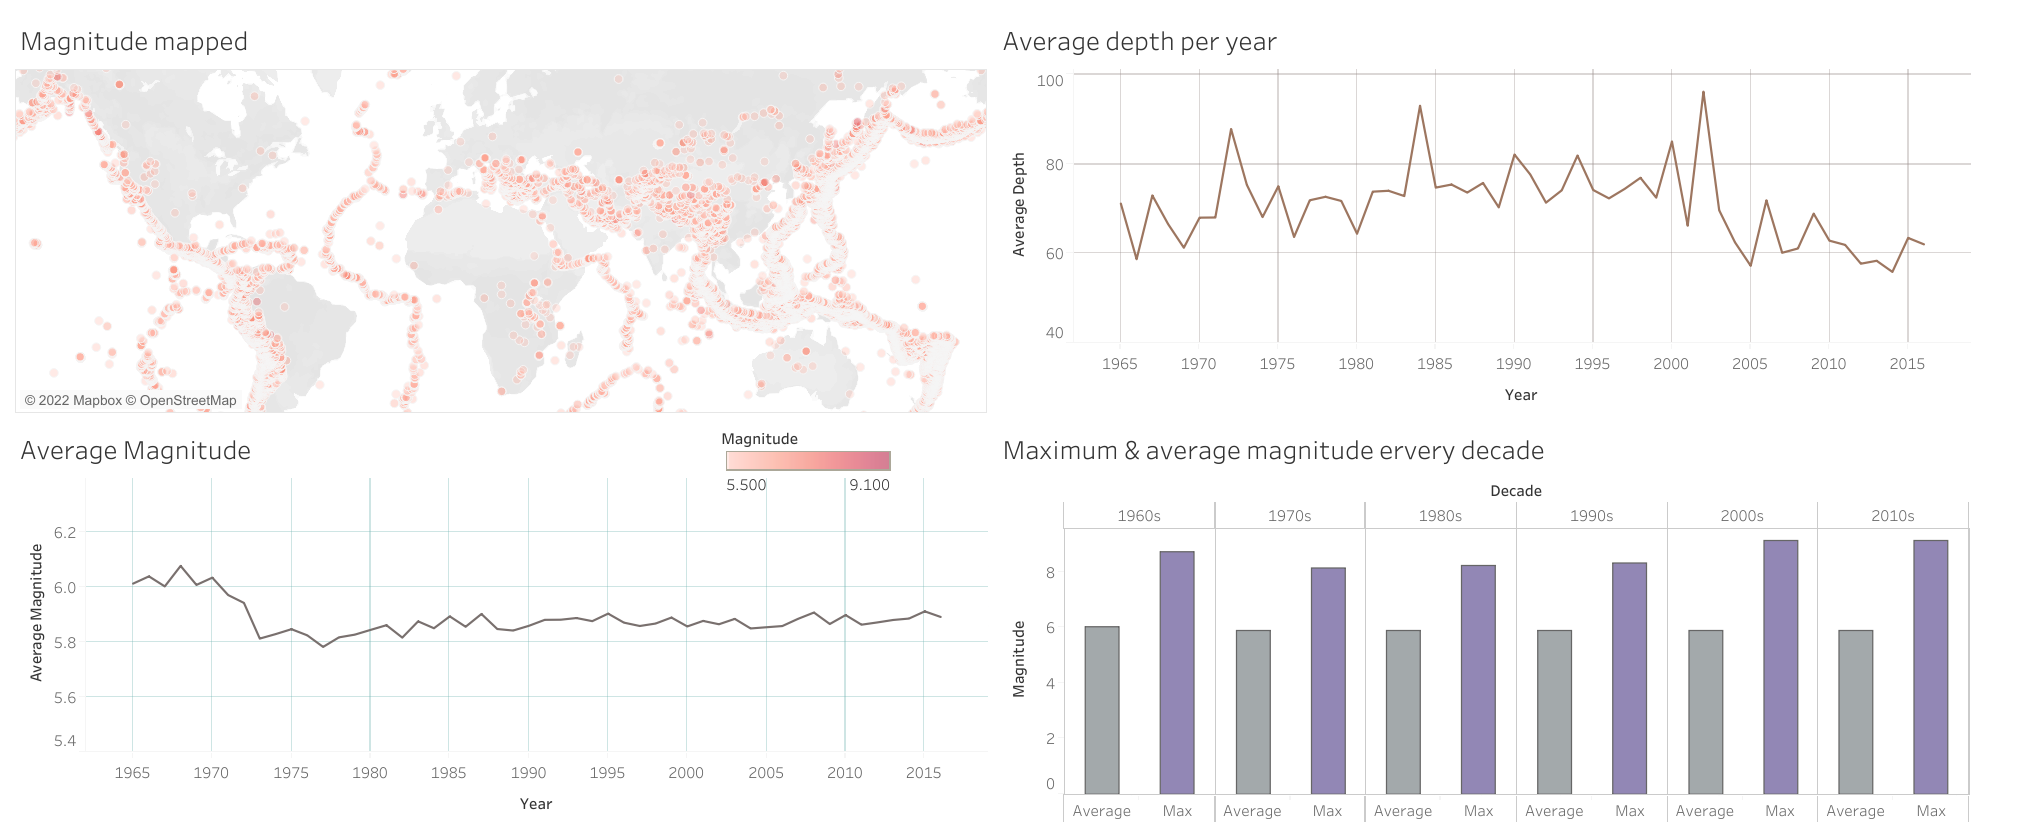